In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df= pd.read_csv('/content/drive/MyDrive/PJ/csv/tipos/Muskmelon.csv')

Mounted at /content/drive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2078 entries, 0 to 2077
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cliente         2078 non-null   object 
 1   precio_venta    2054 non-null   float64
 2   peso            2078 non-null   float64
 3   t_id            2078 non-null   object 
 4   fecha_venta     2076 non-null   object 
 5   hora_venta      2076 non-null   object 
 6   tipo            2078 non-null   object 
 7   fecha_recogida  2078 non-null   object 
 8   hora_recogida   2078 non-null   object 
 9   lote            2078 non-null   object 
 10  marca           2078 non-null   object 
 11  coste_inicial   2018 non-null   float64
 12  proveedor       2078 non-null   object 
dtypes: float64(3), object(10)
memory usage: 211.2+ KB


In [ ]:
print(df.describe())

       precio_venta         peso  coste_inicial
count   2054.000000  2078.000000    2018.000000
mean       3.486666   302.541793       1.989851
std        0.697013   101.663639       0.502442
min        1.205370   -43.764173       0.324282
25%        3.014001   232.918819       1.649095
50%        3.483913   303.275347       1.988132
75%        3.951202   366.225755       2.346349
max        6.100843   611.899221       3.714610


In [ ]:
print(df.head())

         cliente  precio_venta        peso                  t_id fecha_venta  \
0  CompraMaestra      3.991487  354.529119  Muskmelon 001012.png  2022/09/05   
1  CompraMaestra      3.357036  232.242015  Muskmelon 001051.png  2022/09/10   
2  CompraMaestra      3.104217  385.717183  Muskmelon 001058.png  2022/09/15   
3  CompraMaestra           NaN  283.556820  Muskmelon 001076.png  2022/09/11   
4  CompraMaestra      3.478384  242.735917  Muskmelon 001124.png  2022/09/03   

  hora_venta       tipo fecha_recogida hora_recogida  \
0      16:00  muskmelon     2022/09/05         08:00   
1      16:00  muskmelon     2022/09/10         10:00   
2      23:00  muskmelon     2022/09/15         17:00   
3      09:00  muskmelon     2022/09/11         04:00   
4      21:00  muskmelon     2022/09/03         18:00   

                           lote            marca  coste_inicial  \
0  S85C75S69R79T48L49L49N46V78M  VibranteSabores       2.024032   
1  S85C75S69R79T48L49L53M46V78M    EncantoNativo

In [ ]:
df['coste_inicial'] = df['coste_inicial'].round(2)
df['peso'] = df['peso'].round(2)
df['precio_venta'] = df['precio_venta'].round(2)

df.head()

# **PESO**

Empezamos analizando los PESOS

In [ ]:
peso_minimo = df["peso"].min()
peso_maximo = df["peso"].max()
negativos = df[df["peso"] < 0]
nulos = df[df["peso"].isnull()]

print(f"Peso mínimo: {peso_minimo}")
print(f"Peso máximo: {peso_maximo}")
print(f"Total negativos: {len(negativos)}")
print(f"Total nulos: {len(nulos)}")

Peso mínimo: -43.764172590061605
Peso máximo: 611.8992208441481
Total negativos: 3
Total nulos: 0


In [ ]:
df[df["peso"] < 0]["marca"].value_counts()


,count
marca,
DulzuraSilvestre,1
ExquisitoJardín,1
DeliciosoEdén,1


In [ ]:
df[df["peso"] < 0]["proveedor"].value_counts()

,count
proveedor,
Avícola San José,1
Vivero Verde Esperanza,1
Semillero Genético BioCampo,1


In [ ]:
df[df["peso"] < 0]["lote"].unique()

array(['S85C75S69R79T48L49Q51U46V78M', 'S85C75S69R79T48L54L57J80T71',
       'S85C75S69R79T48L57O56J80T71'], dtype=object)

Revisamos si es una marca o proveedor en específico que tiene negativos pero resultan ser los lotes S85C75S69R79T48L.

In [ ]:
print(negativos["peso"])

451     -2.271039
1337   -11.929451
1952   -43.764173
Name: peso, dtype: float64


Para la poca cantidad que son los eliminamos, no tienen sentido tampoco en positivo.

In [ ]:
filas_peso_negativo = df[df["peso"] < 0]
print(filas_peso_negativo)

                 cliente  precio_venta       peso                  t_id  \
451   Mercado del Barrio      3.476954  -2.271039  Muskmelon 001539.png   
1337          MegaCompra      4.169713 -11.929451   Muskmelon 00609.png   
1952          MegaAhorro      3.225490 -43.764173   Muskmelon 00938.png   

     fecha_venta hora_venta       tipo fecha_recogida hora_recogida  \
451   2022/09/21      03:00  muskmelon     2022/09/20         22:00   
1337  2022/09/30      12:00  muskmelon     2022/09/30         08:00   
1952  2022/09/25      12:00  muskmelon     2022/09/25         03:00   

                              lote             marca  coste_inicial  \
451   S85C75S69R79T48L49Q51U46V78M  DulzuraSilvestre       2.308683   
1337   S85C75S69R79T48L54L57J80T71   ExquisitoJardín       2.155678   
1952   S85C75S69R79T48L57O56J80T71     DeliciosoEdén       1.550690   

                        proveedor  
451              Avícola San José  
1337       Vivero Verde Esperanza  
1952  Semillero Genét

Reemplazamos todos los valores negativos por NaN


In [ ]:
df["peso"] = df["peso"].mask(df["peso"] < 0)

In [ ]:
print("Cantidad de pesos mayores de 500 g:", len(df[df['peso'] > 500]))
print("Peso máximo:", df.loc[df['peso'] > 500, 'peso'].max())

Cantidad de pesos mayores de 500 g: 59
Peso máximo: 611.8992208441481


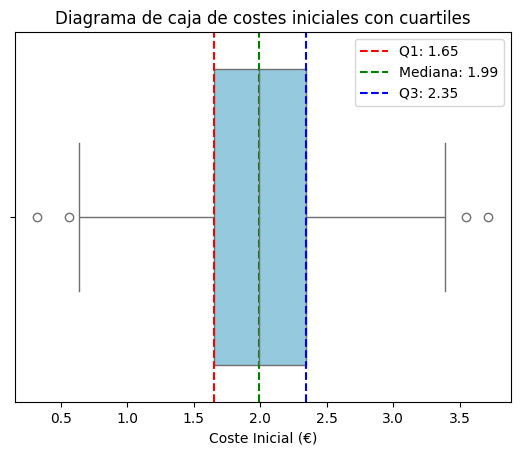

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

costes = df["coste_inicial"].dropna()


q1 = costes.quantile(0.25)
q2 = costes.quantile(0.50)
q3 = costes.quantile(0.75)

sns.boxplot(x=costes, orient='h', color='skyblue')

plt.axvline(q1, color='red', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='green', linestyle='--', label=f'Mediana: {q2:.2f}')
plt.axvline(q3, color='blue', linestyle='--', label=f'Q3: {q3:.2f}')

plt.title('Diagrama de caja de costes iniciales con cuartiles')
plt.xlabel('Coste Inicial (€)')
plt.legend()

plt.show()

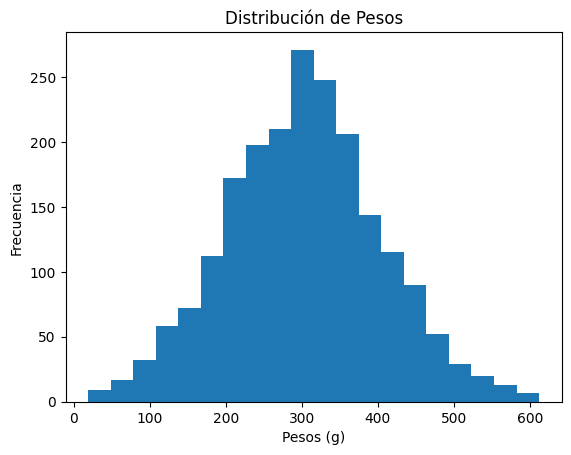

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df["peso"].dropna(), bins=20)
plt.title('Distribución de Pesos')
plt.xlabel('Pesos (g)')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
Q1_pe = df["peso"].quantile(0.25)
Q3_pe = df["peso"].quantile(0.75)
IQR_pe = Q3_pe - Q1_pe
outliers_pe = df[df["peso"] > Q3_pe + 1.5 * IQR_pe]

print("Total outliers:", outliers_pe["peso"].count())
print(Q1_pe)
print(Q3_pe)
print(IQR_pe)

Total outliers: 13
233.38667895030846
366.43301069061016
133.0463317403017


El peso medio de un muskmelon oscila entre 1 y 1,5 kilogramos, lo que seria un peso aproximado entre 1000 y 1500 gr. por unidad.

In [ ]:
print(df[['peso', 't_id']].dropna(subset=['peso']).sort_values(by='peso'))

            peso                  t_id
231    19.202077    Muskmelon 0066.png
2002   30.307782   Muskmelon 00664.png
84     31.269793  Muskmelon 001802.png
951    34.168428   Muskmelon 00865.png
1436   36.949863  Muskmelon 001499.png
...          ...                   ...
1228  599.935884   Muskmelon 00538.png
1316  601.339972  Muskmelon 001718.png
482   603.910961   Muskmelon 00480.png
927   609.796308   Muskmelon 00191.png
1255  611.899221    Muskmelon 0012.png

[2075 rows x 2 columns]


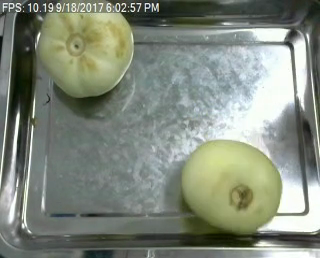

In [ ]:
from IPython.display import Image, display

image_path = '/content/drive/MyDrive/PJ/archive/muskmelon/Muskmelon 001802.png'

try:
    display(Image(filename=image_path))
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta {image_path}. Por favor, verifica la ruta de tu imagen.")
except Exception as e:
    print(f"Ocurrió un error al cargar la imagen: {e}")

 En la imagen podemos ver dos unidades y un peso de 31.26gr.

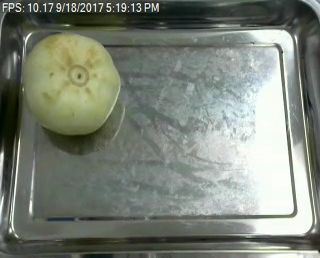

In [ ]:
from IPython.display import Image, display

image_path = '/content/drive/MyDrive/PJ/archive/muskmelon/Muskmelon 00538.png'

try:
    display(Image(filename=image_path))
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta {image_path}. Por favor, verifica la ruta de tu imagen.")
except Exception as e:
    print(f"Ocurrió un error al cargar la imagen: {e}")

En esta imagen vemos un solo muskmelon con un peso de 599.935884 gr.

 Teniendo en cuenta que se supone que son melones pequeños el peso es demasiado pequeño en todas las imagenes.

Dejo los pesos aquí y veremos más adelante. Empiezo con coste inicial.


# **COSTE INICIAL**

In [ ]:
coste_inicial_min = df["coste_inicial"].min()
coste_inicial_max = df["coste_inicial"].max()
negativos_coste = df[df["coste_inicial"] < 0]
nulos_coste = df[df["coste_inicial"].isnull()]

print(f"Coste inicial mínimo: {coste_inicial_min}")
print(f"Coste inicial máximo: {coste_inicial_max}")
print(f"Coste inicial negativos: {len(negativos_coste)}")
print(f"Coste inicial nulos: {len(nulos_coste)}")

Coste inicial mínimo: 0.3242821262985036
Coste inicial máximo: 3.714610326571536
Coste inicial negativos: 0
Coste inicial nulos: 60


No encontramos negativos y los costes iniciales van desde los 0.32 hasta los 3.71


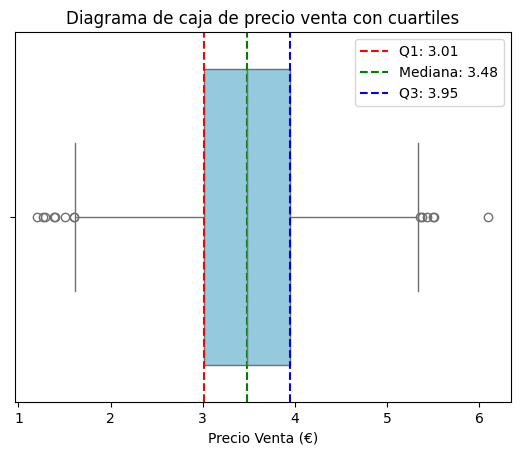

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

costes = df["precio_venta"].dropna()


q1 = costes.quantile(0.25)
q2 = costes.quantile(0.50)
q3 = costes.quantile(0.75)

sns.boxplot(x=costes, orient='h', color='skyblue')

plt.axvline(q1, color='red', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='green', linestyle='--', label=f'Mediana: {q2:.2f}')
plt.axvline(q3, color='blue', linestyle='--', label=f'Q3: {q3:.2f}')

plt.title('Diagrama de caja de precio venta con cuartiles')
plt.xlabel('Precio Venta (€)')
plt.legend()

plt.show()

En el gráfico se ven muchos outliers. Vamos a ver en otro gráfico como visualizamos los datos.

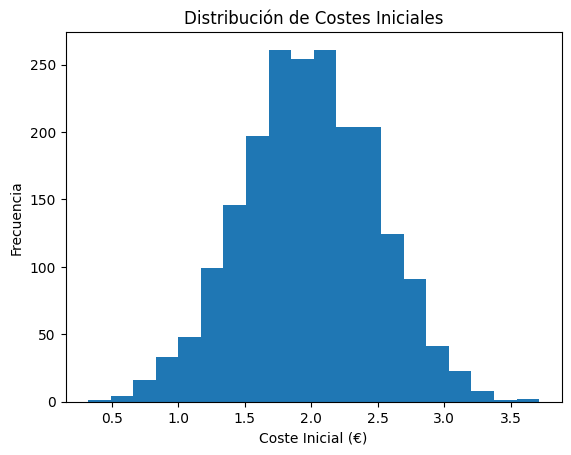

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df["coste_inicial"].dropna(), bins=20)
plt.title('Distribución de Costes Iniciales')
plt.xlabel('Coste Inicial (€)')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
Q1_ci = df["coste_inicial"].quantile(0.25)
Q3_ci = df["coste_inicial"].quantile(0.75)
IQR_ci = Q3_ci - Q1_ci
outliers_ci = df[df["coste_inicial"] > Q3_ci + 1.5 * IQR_ci]

print("Total outliers:", outliers_ci["coste_inicial"].count())
print(Q1_ci)
print(Q3_ci)
print(IQR_ci)

Total outliers: 2
1.6490947352307597
2.3463485217968465
0.6972537865660868


Una vez analizados los costes iniciales y viendo que tenemos 2 outliers y el resto de costes se mueven en la media deben de ser excepciones por algún motivo de calidad, tamaño o imperfecciones de la fruta.

Pasamos a analizar los precios de venta:

# **PRECIO VENTA**

In [ ]:
peso_minimo_pv = df["precio_venta"].min()
peso_maximo_pv = df["precio_venta"].max()
negativos_pv = df[df["precio_venta"] < 0]
nulos_pv = df[df["precio_venta"].isnull()]

print(f"Precio venta mínimo: {peso_minimo_pv}")
print(f"Precio venta máximo: {peso_maximo_pv}")
print(f"Total negativos: {len(negativos_pv)}")
print(f"Total nulos: {len(nulos_pv)}")

Precio venta mínimo: 1.205370398742214
Precio venta máximo: 6.100842680792411
Total negativos: 0
Total nulos: 24


Sabemos que las frutas que no tienen datos de venta es fruta que no ha podido ser vendida porque ha sido dañada durante la distribución. Vamos a comprobar si tienen fecha de venta.

In [ ]:
display(nulos_pv[nulos_pv["fecha_venta"].isnull()])

,cliente,precio_venta,peso,t_id,fecha_venta,hora_venta,tipo,fecha_recogida,hora_recogida,lote,marca,coste_inicial,proveedor


Ninguno de los 24 nulos es un producto dañado y que, por lo tanto, no ha sido vendido. El resto ha sufrido una perdida de información o esta información no ha sido registrada correctamente.

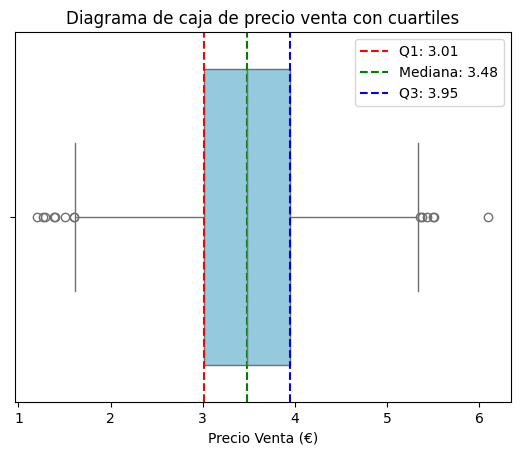

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

costes = df["precio_venta"].dropna()


q1 = costes.quantile(0.25)
q2 = costes.quantile(0.50)
q3 = costes.quantile(0.75)

sns.boxplot(x=costes, orient='h', color='skyblue')

plt.axvline(q1, color='red', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='green', linestyle='--', label=f'Mediana: {q2:.2f}')
plt.axvline(q3, color='blue', linestyle='--', label=f'Q3: {q3:.2f}')

plt.title('Diagrama de caja de precio venta con cuartiles')
plt.xlabel('Precio Venta (€)')
plt.legend()

plt.show()

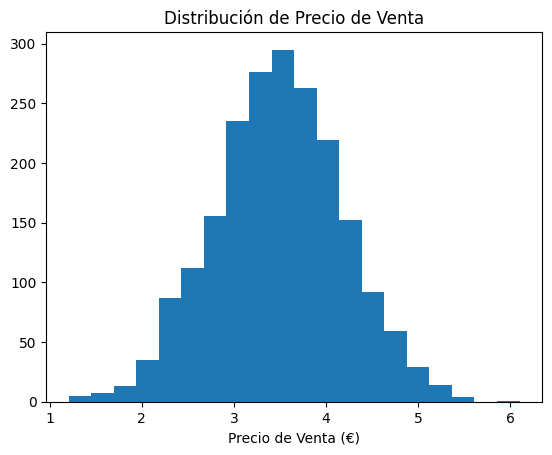

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df["precio_venta"].dropna(), bins=20)
plt.title('Distribución de Precio de Venta')
plt.xlabel('Precio de Venta (€)')
plt.ylabel('')
plt.show()

In [ ]:
Q1_pv = df["precio_venta"].quantile(0.25)
Q3_pv = df["precio_venta"].quantile(0.75)
IQR_pv = Q3_pv - Q1_pv
outliers_pv = df[df["precio_venta"] > Q3_pv + 1.5 * IQR_pv]

print("Total outliers:", outliers_pv["precio_venta"].count())
print(Q1_pv)
print(Q3_pv)
print(IQR_pv)

Total outliers: 6
3.0140009695339107
3.9512023775206164
0.9372014079867057


En precio venta tenemos 6 outliers mientras que en coste inicial teníamos 2.

In [ ]:
outliers_pv_ci = pd.merge(outliers_ci, outliers_pv, on='t_id', how='inner')
outliers_pv_ci

,cliente_x,precio_venta_x,peso_x,t_id,fecha_venta_x,hora_venta_x,tipo_x,fecha_recogida_x,hora_recogida_x,lote_x,...,peso_y,fecha_venta_y,hora_venta_y,tipo_y,fecha_recogida_y,hora_recogida_y,lote_y,marca_y,coste_inicial_y,proveedor_y
0,La Tienda Justa,6.100843,413.402812,Muskmelon 001459.png,2022/09/16,02:00,muskmelon,2022/09/15,20:00,S85C75S69R79T48L49P53U46V78M,...,413.402812,2022/09/16,02:00,muskmelon,2022/09/15,20:00,S85C75S69R79T48L49P53U46V78M,FrescoDelValle,3.71461,Fitosanitarios BioPro


1 coincide.

Vamos a comprobar la norma que tenemos que cumplir que desde día de recogida hasta fecha venta tiene que pasar al menos un día.

In [ ]:
df['fecha_venta'] = pd.to_datetime(df['fecha_venta'], errors='coerce')
df['fecha_recogida'] = pd.to_datetime(df['fecha_recogida'], errors='coerce')

tiempo_diferencia = df['fecha_venta'] - df['fecha_recogida']

al_menos_un_dia = (tiempo_diferencia >= pd.Timedelta(days=1)).all()

print(f"Es verdad que desde fecha_recogida y fecha_venta pasa al menos un día? {al_menos_un_dia}")

Es verdad que desde fecha_recogida y fecha_venta pasa al menos un día? False


In [ ]:
tiempo_diferencia.min()

Timedelta('-29 days +00:00:00')

In [ ]:
tiempo_diferencia.sort_values()

,0
1430,-29 days
347,-28 days
1084,-25 days
1421,-22 days
1722,-19 days
...,...
451,1 days
1397,1 days
2077,1 days
294,NaT


Nos encontramos con datos negativos.
Sabemos que no se pueden realizar reservas antes de la recogida por lo que es un error y la norma no se cumple.

**No en todos los productos pasan 24 horas mínimo desde la recogida hasta la venta.**

El peso está en gramos. Vamos a comprobar si a cada proveedor no se le venden más de 100Kg de fruta en un solo día.

In [ ]:
venta_dia = df.groupby(['proveedor', 'fecha_venta'])['peso'].sum()

mayor_100kg = (venta_dia > 100000).any()

print(f"¿Algún proveedor recibe más de 100 kg en un solo día? {mayor_100kg}")

¿Algún proveedor recibe más de 100 kg en un solo día? False


No se le vende más de 100Kg de muskmelon a un proveedor en un solo día.

**En el caso de muskmelon esta norma se cumple.**

Vamos a comprobar que 1 lote solo contiene un tipo de fruta y de una sola marca.

In [ ]:
lote_check = df.groupby('lote').agg({
    'tipo': 'nunique',
    'marca': 'nunique'
}).reset_index()

tipo_check = lote_check[lote_check['tipo'] > 1]
marca_check = lote_check[lote_check['marca'] > 1]

if tipo_check.empty and marca_check.empty:
    print("Cada lote solo contiene un tipo de fruta o una marca.")
else:
    print("Norma incumplida:")
    if not tipo_check.empty:
        print("\nLotes con más de un tipo de fruta:")
        display(tipo_check)
    if not marca_check.empty:
        print("\nLotes con más de una marca:")
        display(marca_check)

Cada lote solo contiene un tipo de fruta o una marca.


En un solo lote con muskmelon no encontramos más de un tipo de fruta ni más de una marca.

**Con muskmelon esta norma se cumple.**

In [ ]:
df = df.dropna(subset=['coste_inicial', 'precio_venta'])
df = df[df['coste_inicial'] != 0]
df['rentabilidad'] = ((df['precio_venta'] - df['coste_inicial']) / df['coste_inicial']) * 100

df_lote = df.groupby('lote', as_index=False)[['coste_inicial', 'precio_venta', 'rentabilidad']].mean()

corr = df_lote[['coste_inicial', 'precio_venta', 'rentabilidad']].corr()
display(corr)

,coste_inicial,precio_venta,rentabilidad
coste_inicial,1.000000,0.698563,-0.63034
precio_venta,0.698563,1.000000,0.04786
rentabilidad,-0.630340,0.047860,1.00000


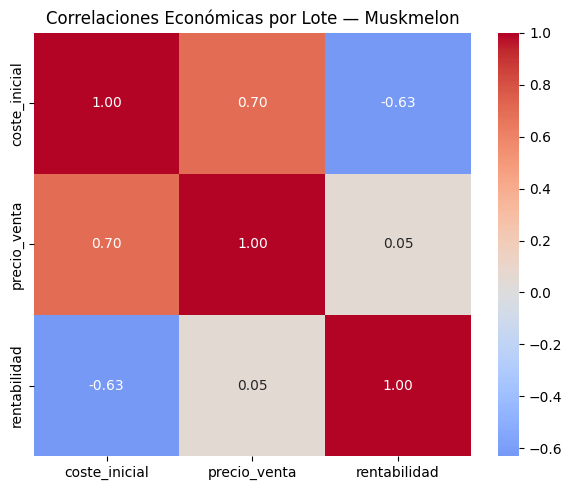

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlaciones Económicas por Lote — Muskmelon')
plt.tight_layout()
plt.show()

               precio_venta  coste_inicial      peso
precio_venta       1.000000       0.698563  0.020724
coste_inicial      0.698563       1.000000  0.001990
peso               0.020724       0.001990  1.000000


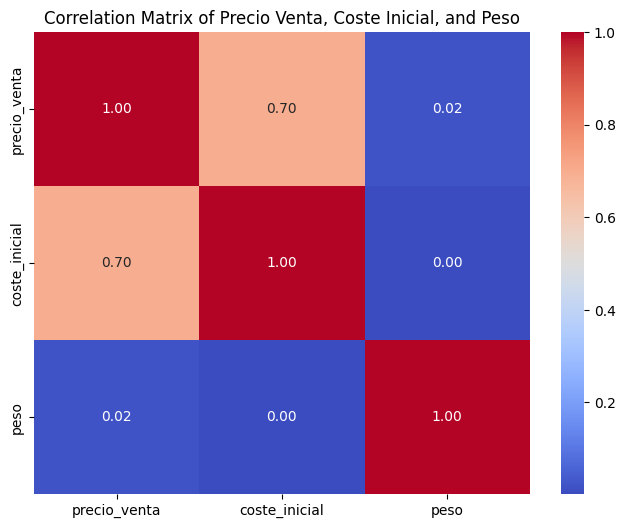

In [ ]:
correlation_matrix = df[['precio_venta', 'coste_inicial', 'peso']].corr()

print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Precio Venta, Coste Inicial, and Peso')
plt.show()

Las correlaciones entre coste inicial y precio venta son de 0.70 mientras que no encontramos correlación entre precio venta y peso ni entre coste inicial y peso. Creemos que esto debería estar totalmente relacionado ya que a mayor peso deberia tener un coste o precio mayor. Esto refuerza la teoria que exponemos de que los pesos no son correctos.

Aqui dejamos el analisis de los muskmelon y pasamos a analizar la siguiente fruta.